In [271]:
import pandas as pd
import matplotlib.pyplot as plt

In [278]:
#1 Apartment Prices

df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

#1.1 Calculate the price per square meter (ppsqm) for each apartment sold. That is, add a new variable to your table containing the data representing the ppsqm.
df["ppsqm"] = df["soldPrice"]//df["livingArea"]

#1.2 Rank the top 5 most expensive appartments w.r.t ppsqm. Present this in a table. Hint: Use a sort function.
df_sorted = df.sort_values("ppsqm", ascending=False).head(5)
df_sorted

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
67,1595000,1464.0,24.0,1.0,2016-01-07 14:51:06,1935.0,Lägenhet,2018259,2016-01-21,2500000,...,18.055270,NaN,Stockholm,Stockholms län,161,Notar,1566,Broker,http://www.notar.se/,104166.0
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,...,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,102083.0
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,...,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/,100000.0
34,1750000,1144.0,25.0,1.0,2017-05-18 16:20:57,1936.0,Lägenhet,2330886,2017-06-01,2210000,...,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,88400.0
55,1895000,1522.0,26.9,1.0,2016-04-01 22:56:37,1968.0,Lägenhet,2067384,2016-04-19,2300000,...,18.058529,True,Stockholm,Stockholms län,298,Notar,1566,Broker,http://www.notar.se/,85501.0


In [177]:
#1.3 What is the avereage ppsqm in Ekhagen?
df["ppsqm"].mean()

58758.92993630573

# 1.4 Highlight an aspect of the data that you find interesting. Explain your choice.
We can observe that the top five most expensive apartments in terms of price per square meter all have only one room.

In [190]:
#2 The Swedish Election of 2018

#2.1 Calculate the total number of legitimate votes (Giltiga Röster) in Stockholm during the election. That is, sum upp the number of legitimate votes for all municipalities (kommun) in Stockholm.
df_2 = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep=";", decimal=",")
condition = df_2["LÄNSNAMN"].str.contains("Stockholms") 
Data_in_Stockholm = df_2[condition]
Sum = sum(Data_in_Stockholm["RÖSTER GILTIGA"])
Sum

1426237

In [202]:
#2.2 In which municipality did the social democratic party (Social demokraterna, S) garner the hightest voting percentage?
df_2.sort_values("S", ascending=False).head(1)["KOMMUNNAMN"]

188    Munkfors
Name: KOMMUNNAMN, dtype: object

In [198]:
#2.3 Rank the (3) municipialities with highest participation (valdeltagande). Present this in the form of a table.
df_2.sort_values("VALDELTAGANDE", ascending=False).head(3)["KOMMUNNAMN"]

103       Lomma
59         Habo
98     Vellinge
Name: KOMMUNNAMN, dtype: object

# 3 Predicting Strokes
I loaded the stroke data from a CSV file using pandas. I then calculated the total number of strokes for married and 
never married individuals. Using these counts, I determined the proportion of total strokes for each group. Finally, 
I used matplotlib to create a bar chart displaying the proportions of strokes for married and never married individuals.

220


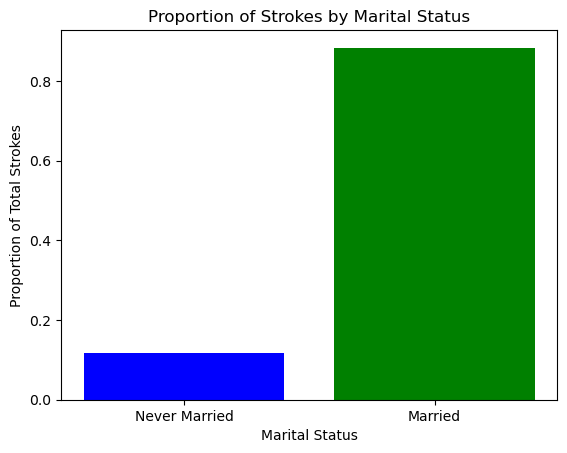

In [272]:
#3 Predicting Strokes


#3.1
df_3 = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

#Married_stroke
condition_1 = (df_3["ever_married"].str.contains("Yes"))
Married_stroke = df_3[condition_1]["stroke"].sum()

#Never_married_stroke
condition_2 = (df_3["ever_married"].str.contains("No"))
Never_married_stroke = df_3[condition_2]["stroke"].sum()

#Tot stroke
Tot_stroke = df_3["stroke"].sum()

print(Married_stroke)

A = Never_married_stroke / Tot_stroke
B = Married_stroke / Tot_stroke

#

labels = ['Never Married', 'Married']
values = [A, B]

plt.bar(labels, values, color=['blue', 'green'])
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Total Strokes')
plt.title('Proportion of Strokes by Marital Status')
plt.show()

# Conclusions 
The data indicates that married individuals have a higher incidence of strokes compared to never married individuals. This suggests a potential association between being married and increased stroke risk. Further investigation is needed to understand the underlying causes and contributing factors.